In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


Gefitte energie: 2.500 MeV, Massa elektron: 1.000e+00 kg


C:\Users\maria\AppData\Local\Temp\ipykernel_28500\3852206492.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(compton, theta_data, energy_data, sigma=energy_error)


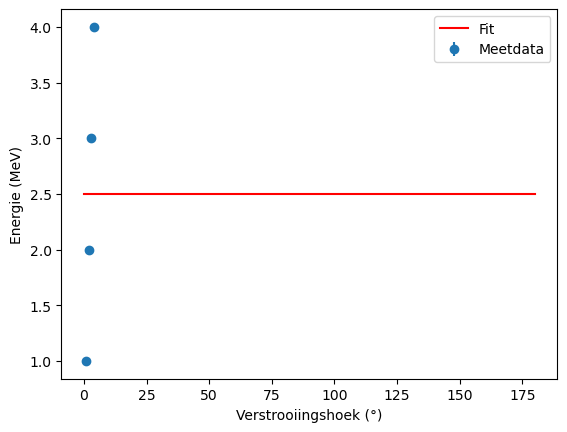

In [ ]:
# compton scattering functie
def compton(theta, E, me):
    return E / (1 + (E / (me * 3e8 **2)) * (1 - np.cos(np.radians(theta))))


theta_data = np.array([])  # hoek in graden
energy_data = np.array([1, 2, 3, 4])  # energie in MeV
energy_error = np.array([0.01, 0.01, 0.01, 0.01])  # onzekerheid

# curve fit gedoe
popt, pcov = curve_fit(compton, theta_data, energy_data, sigma=energy_error)
E_fit, me_fit = popt  # gefitte parameters
print(f"Gefitte energie: {E_fit:.3f} MeV, Massa elektron: {me_fit:.3e} kg")

# plot
theta_fit = np.linspace(0, 180, 500)
energy_fit = compton(theta_fit, *popt)
plt.errorbar(theta_data, energy_data, yerr=energy_error, fmt='o', label='Meetdata')
plt.plot(theta_fit, energy_fit, label='Fit', color='red')
plt.xlabel('Scattering (°)')
plt.ylabel('Energie (MeV)')
plt.legend()
plt.show()

In [ ]:
def energy_error_theta(theta, E, me, sigma_theta):
    factor = (E / (me * 3e8**2)) * np.sin(np.radians(theta))
    nom = (1 + (E / (me * 3e8**2)) * (1 - np.cos(np.radians(theta))))**2
    dE_dtheta = E * factor / nom
    return np.abs(dE_dtheta) * sigma_theta

sigma_theta_contribution = energy_error_theta(theta_data, 0.662, 9.11e-31, sigma_theta_rad)

sigma_total = np.sqrt(sigma_detector**2 + sigma_statistical**2 + sigma_calibration**2 + sigma_theta_contribution**2) #alle fouten nog erbij doen
